In [4]:
import pandas as pd
diabetes = pd.read_csv('diabetes.csv')
diabetes

,PatientID,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic
0,1354778,0,171,80,34,23,43.509726,1.213191,21,0
1,1147438,8,92,93,47,36,21.240576,0.158365,23,0
2,1640031,7,115,47,52,35,41.511523,0.079019,23,0
3,1883350,9,103,78,25,304,29.582192,1.282870,43,1
4,1424119,1,85,59,27,35,42.604536,0.549542,22,0
...,...,...,...,...,...,...,...,...,...,...
14995,1490300,10,65,60,46,177,33.512468,0.148327,41,1
14996,1744410,2,73,66,27,168,30.132636,0.862252,38,1
14997,1742742,0,93,89,43,57,18.690683,0.427049,24,0
14998,1099353,0,132,98,18,161,19.791645,0.302257,23,0


In [5]:
features = ['Pregnancies', 'PlasmaGlucose', 'DiastolicBloodPressure', 'TricepsThickness', 'SerumInsulin', 'BMI', 'DiabetesPedigree', 'Age']
target = 'Diabetic'
X, y = diabetes[features], diabetes[target]
print('X:')
display(X)
print('y:')
display(y)

X:


,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age
0,0,171,80,34,23,43.509726,1.213191,21
1,8,92,93,47,36,21.240576,0.158365,23
2,7,115,47,52,35,41.511523,0.079019,23
3,9,103,78,25,304,29.582192,1.282870,43
4,1,85,59,27,35,42.604536,0.549542,22
...,...,...,...,...,...,...,...,...
14995,10,65,60,46,177,33.512468,0.148327,41
14996,2,73,66,27,168,30.132636,0.862252,38
14997,0,93,89,43,57,18.690683,0.427049,24
14998,0,132,98,18,161,19.791645,0.302257,23


y:


0        0
1        0
2        0
3        1
4        0
        ..
14995    1
14996    1
14997    0
14998    0
14999    1
Name: Diabetic, Length: 15000, dtype: int64

In [6]:
pd.Series(y).value_counts(normalize=True)

Diabetic
0    0.666667
1    0.333333
Name: proportion, dtype: float64

In [7]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PatientID               15000 non-null  int64  
 1   Pregnancies             15000 non-null  int64  
 2   PlasmaGlucose           15000 non-null  int64  
 3   DiastolicBloodPressure  15000 non-null  int64  
 4   TricepsThickness        15000 non-null  int64  
 5   SerumInsulin            15000 non-null  int64  
 6   BMI                     15000 non-null  float64
 7   DiabetesPedigree        15000 non-null  float64
 8   Age                     15000 non-null  int64  
 9   Diabetic                15000 non-null  int64  
dtypes: float64(2), int64(8)
memory usage: 1.1 MB


In [8]:
X.describe()

,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,3.224533,107.856867,71.220667,28.814000,137.852133,31.509646,0.398968,30.137733
std,3.391020,31.981975,16.758716,14.555716,133.068252,9.759000,0.377944,12.089703
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200512,0.078044,21.000000
25%,0.000000,84.000000,58.000000,15.000000,39.000000,21.259887,0.137743,22.000000
50%,2.000000,104.000000,72.000000,31.000000,83.000000,31.767940,0.200297,24.000000
75%,6.000000,129.000000,85.000000,41.000000,195.000000,39.259692,0.616285,35.000000
max,14.000000,192.000000,117.000000,93.000000,799.000000,56.034628,2.301594,77.000000


Unique values: 15


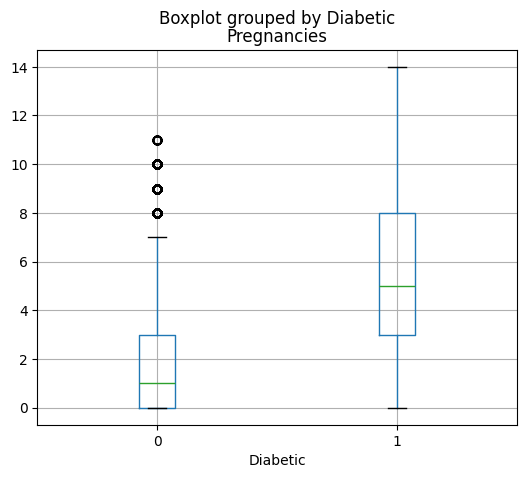

Unique values: 149


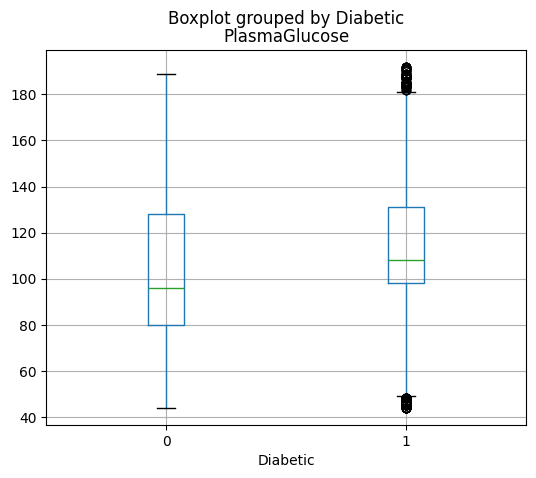

Unique values: 90


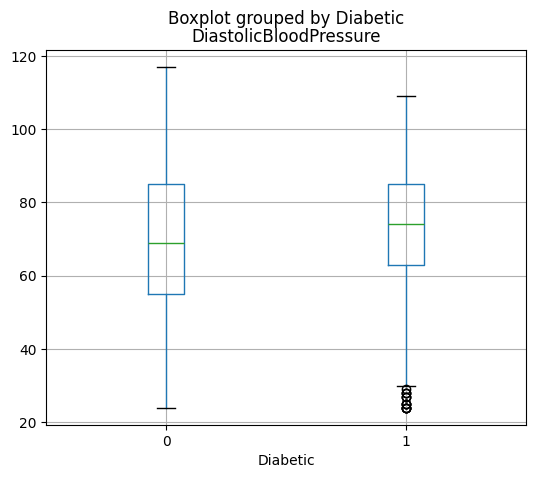

Unique values: 69


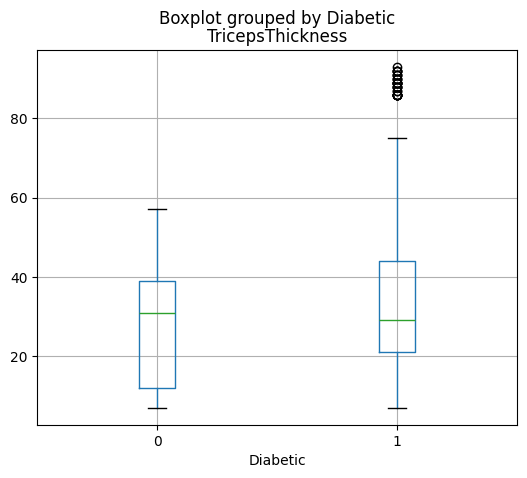

Unique values: 663


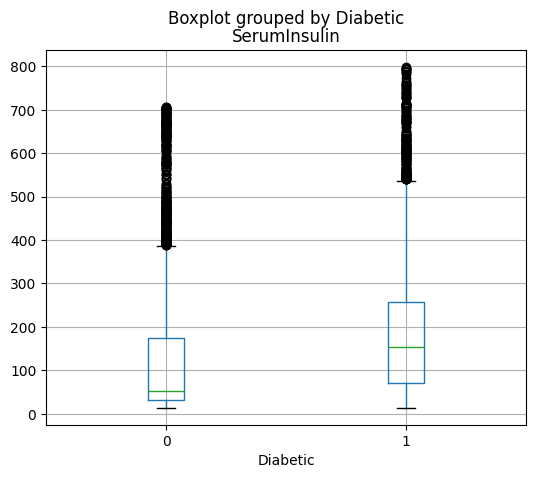

Unique values: 15000


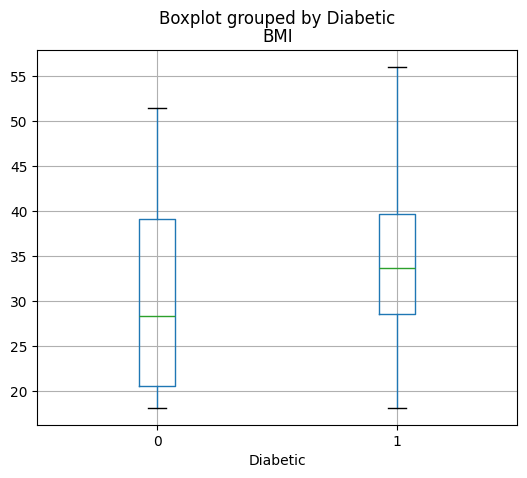

Unique values: 14999


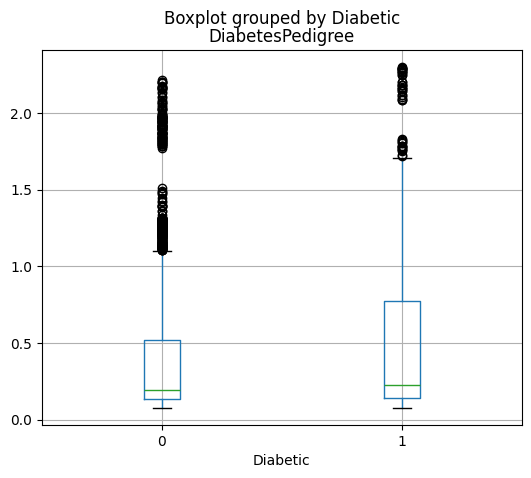

Unique values: 56


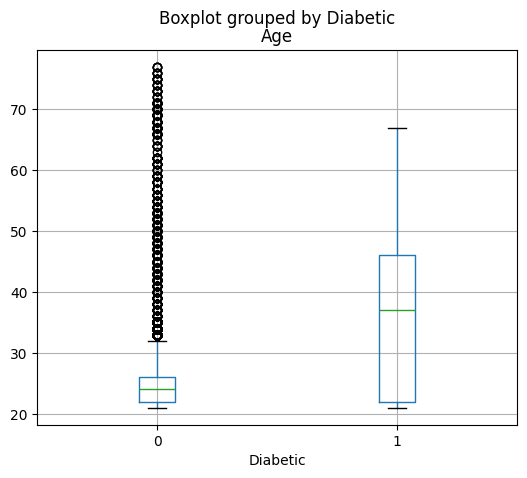

In [9]:
import matplotlib.pyplot as plt
for col in features:
    print(f'Unique values: {len(diabetes[col].unique())}')
    diabetes.boxplot(column=col, by='Diabetic', figsize=(6,5))
    plt.title(col)
    plt.show()

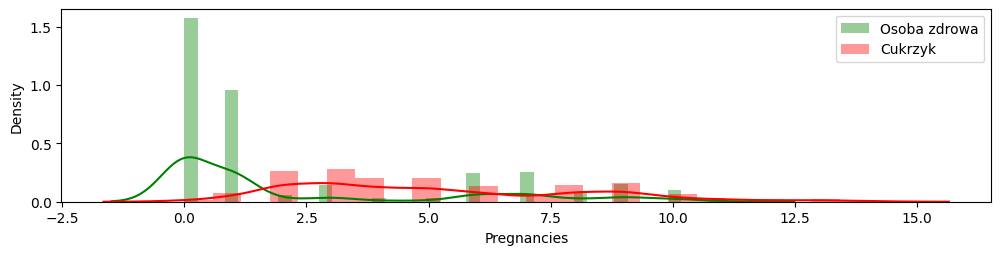

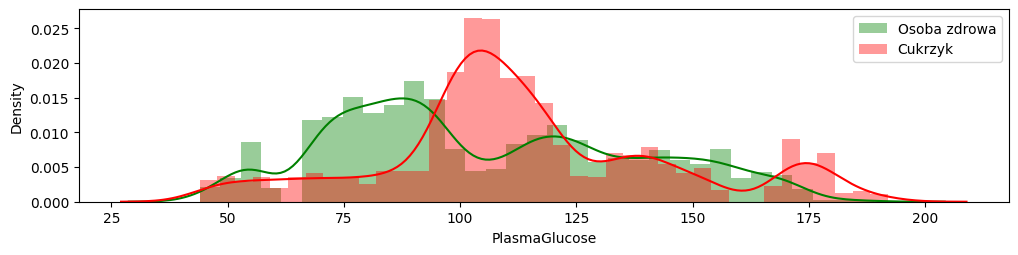

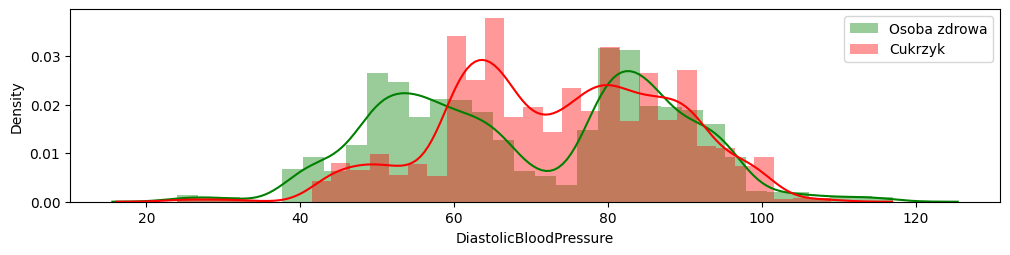

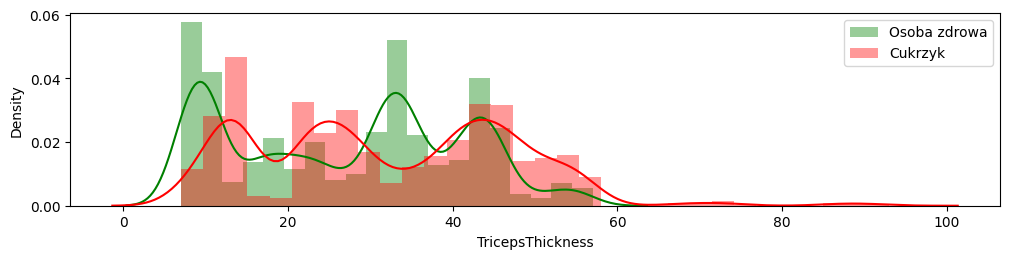

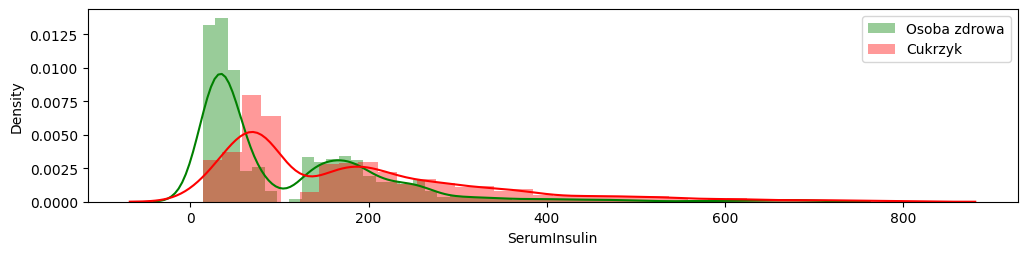

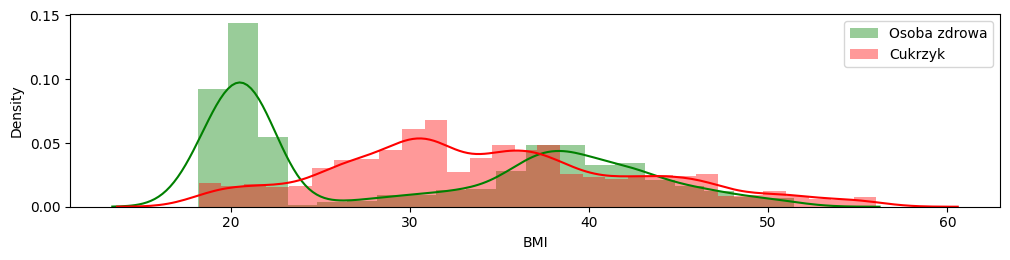

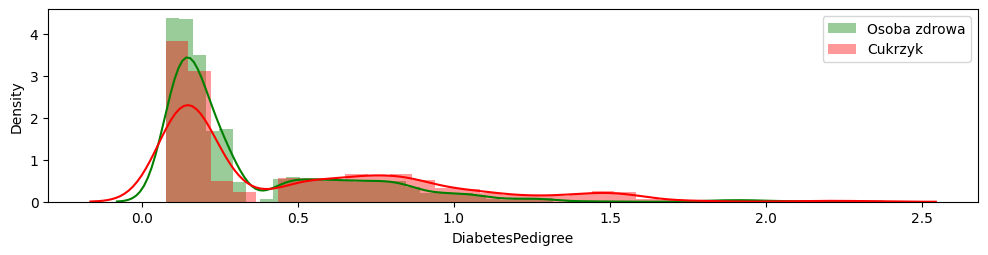

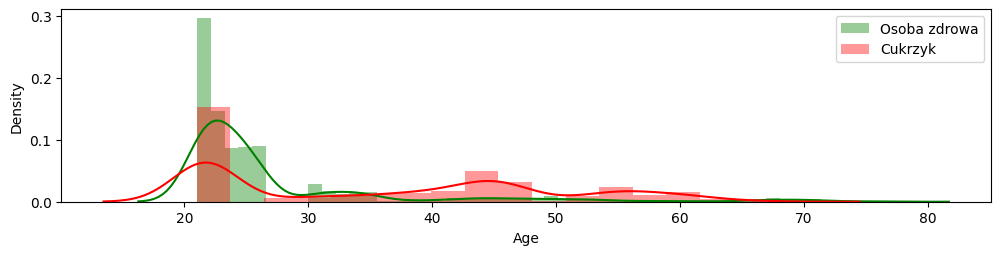

In [10]:
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
for col in features:
    plt.figure(figsize=(12, 2.5))
    sns.distplot(diabetes.loc[diabetes['Diabetic']==0, col], kde=True, color='green', label='Osoba zdrowa')
    sns.distplot(diabetes.loc[diabetes['Diabetic']==1, col], kde=True, color='red', label='Cukrzyk')
    plt.legend(loc='upper right')
    plt.show()

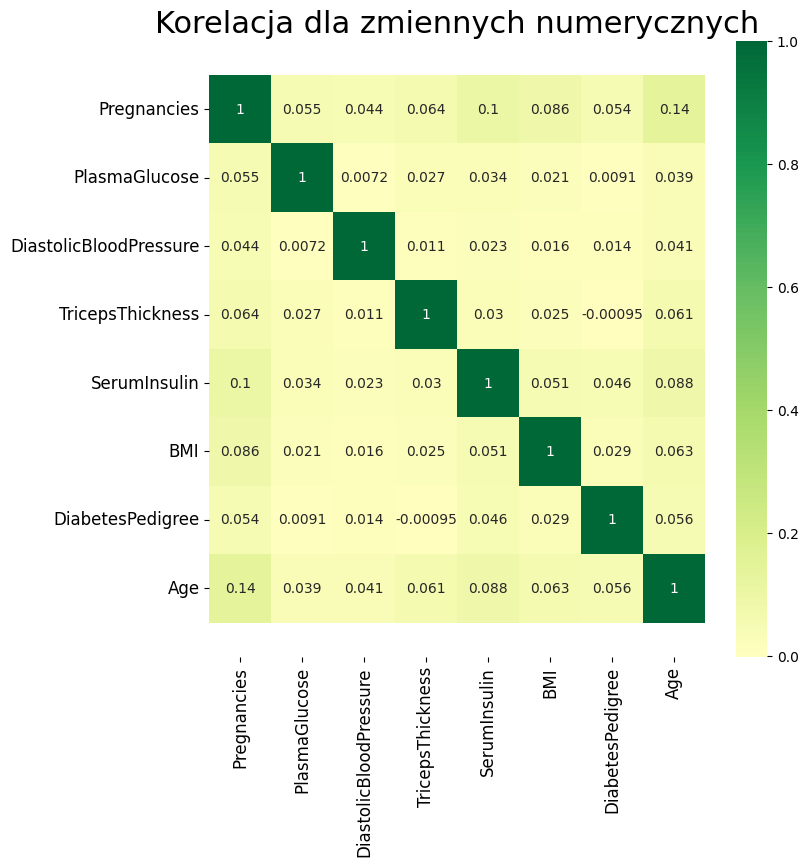

In [11]:
plt.figure(figsize=(8,8))
ax = sns.heatmap(X.corr(),
                 xticklabels=X.corr().columns,
                 yticklabels=X.corr().columns,
                 cmap='RdYlGn',
                 center=0,
                 annot=True)
plt.title('Korelacja dla zmiennych numerycznych', fontsize=22)
bottom, top=ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [12]:
#liczymy współczynnik korelacji punktowo-dwuseryjnej
from scipy import stats

corr_dict = {}
for col in features:
    corr_dict[col] = stats.pointbiserialr(X[col], y)[0]
pd.Series(corr_dict).sort_values(ascending=False)

Pregnancies               0.407315
Age                       0.342605
SerumInsulin              0.247375
BMI                       0.210508
DiabetesPedigree          0.170302
TricepsThickness          0.152505
PlasmaGlucose             0.128004
DiastolicBloodPressure    0.091307
dtype: float64

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X[['Pregnancies', 'Age']], y, test_size=0.30, random_state=0, stratify=y)
print('Treningowe obserwacje: %d\nTestowe obserwacje: %d' %(X_train.shape[0], X_test.shape[0]))

Treningowe obserwacje: 10500
Testowe obserwacje: 4500


In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

scaler_2var = StandardScaler()
X_train_standarized = scaler_2var.fit_transform(X_train)
X_test_standarized = scaler_2var.transform(X_test)
model_lr = LogisticRegression()
model_lr.fit(X_train_standarized, y_train)

LogisticRegression()

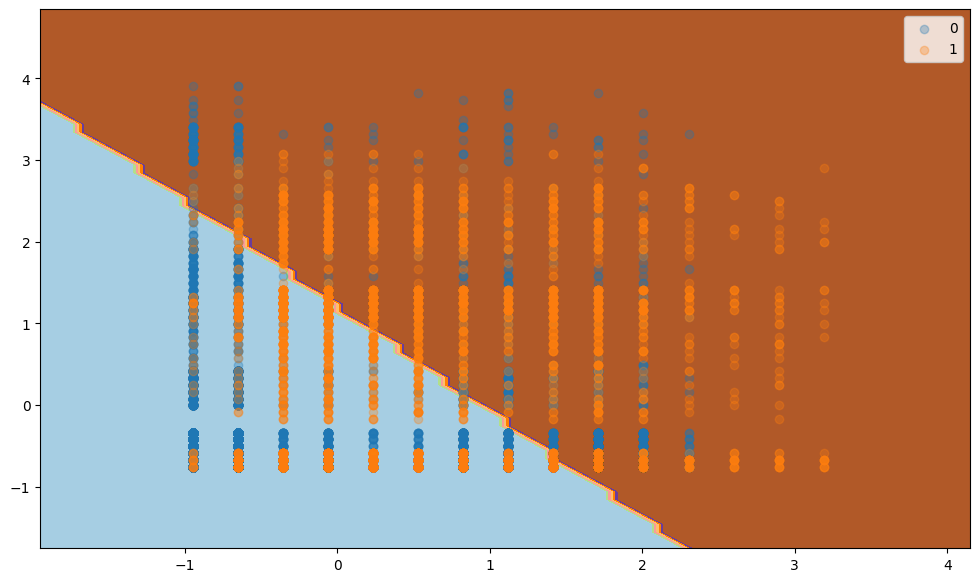

In [15]:
from numpy import where
from numpy import meshgrid
from numpy import arange
from numpy import hstack

def plot_classification_surface(X_plot, y_plot, trained_model):
    plt.figure(figsize=(12,7))

    min1, max1 = X_plot[:, 0].min()-1, X_plot[:, 0].max()+1
    min2, max2 = X_plot[:, 1].min()-1, X_plot[:, 1].max()+1
#Wyznaczane są minimalne i maksymalne wartości dla każdej osi (pierwsza i druga kolumna zbioru X_plot).
#Dodanie i odjęcie 1 od wartości minimalnych/maksymalnych zwiększa zakres, by granice były bardziej czytelne na wykresie.

    x1grid = arange(min1, max1, 0.1)
    x2grid = arange(min2, max2, 0.1)
    xx, yy = meshgrid(x1grid, x2grid)
#arange(min1, max1, 0.1) tworzy równomiernie rozłożone wartości między min1 i max1 z krokiem 0.1 (to samo dla x2grid).
#meshgrid generuje siatkę 2D, na której zostanie zwizualizowana powierzchnia decyzyjna

    r1, r2 = xx.flatten(), yy.flatten()
    r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2),1))
    grid = hstack((r1,r2))
#xx.flatten() i yy.flatten() zamieniają siatkę 2D na wektory 1D.
#hstack((r1, r2)) łączy dwie kolumny w macierz o kształcie (n_punktów, 2). Każdy wiersz odpowiada jednemu punktowi w przestrzeni 2D

    yhat = trained_model.predict(grid)
    zz = yhat.reshape(xx.shape)
#Model dokonuje predykcji dla każdego punktu z siatki (macierz grid).
#Wyniki (yhat) są przekształcane na kształt siatki (xx.shape), by móc zwizualizować powierzchnię decyzyjną

    plt.contourf(xx, yy, zz, cmap='Paired')
#contourf tworzy kolorową mapę dla siatki punktów na podstawie przyporządkowanych klas (zz).
#cmap='Paired' to paleta kolorów, gdzie różne kolory reprezentują różne klasy  

    for class_value in range(2):
        row_ix = where(y_plot==class_value)
        plt.scatter(X_plot[row_ix, 0], X_plot[row_ix, 1], cmap='Paired', alpha=0.3, label=class_value)
#Pętla iteruje przez wszystkie klasy (np. 0 i 1).
#where(y_plot == class_value) wybiera indeksy obserwacji należących do danej klasy.
#plt.scatter rysuje punkty na wykresie dla wybranych indeksów

    plt.legend(loc='upper right')
    plt.show()

plot_classification_surface(X_plot=X_train_standarized, y_plot=y_train, trained_model=model_lr)


In [16]:
predictions_lr = model_lr.predict(X_test_standarized)
print('Predicted labels: ', predictions_lr[:5],predictions_lr[-5:])
print('Actual labels:    ', y_test[:5].values, y_test[-5:].values)

Predicted labels:  [0 0 1 0 0] [1 0 1 0 0]
Actual labels:     [0 1 0 0 0] [1 1 0 0 0]


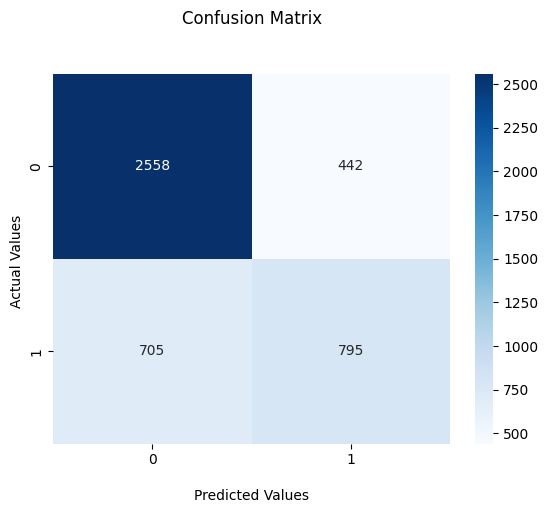

In [17]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, predictions_lr)
ax = sns.heatmap(cm, annot=True, cmap='Blues', fmt='.0f')
ax.set_title('Confusion Matrix\n\n')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ')
plt.show()

In [18]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print('Accuracy: ', accuracy_score(y_test, predictions_lr))
print("Precision:", precision_score(y_test, predictions_lr))
print("Recall:", recall_score(y_test, predictions_lr))
print("F1_score:", f1_score(y_test, predictions_lr))

Accuracy:  0.7451111111111111
Precision: 0.6426839126919968
Recall: 0.53
F1_score: 0.5809280233832663


In [19]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions_lr))

              precision    recall  f1-score   support

           0       0.78      0.85      0.82      3000
           1       0.64      0.53      0.58      1500

    accuracy                           0.75      4500
   macro avg       0.71      0.69      0.70      4500
weighted avg       0.74      0.75      0.74      4500



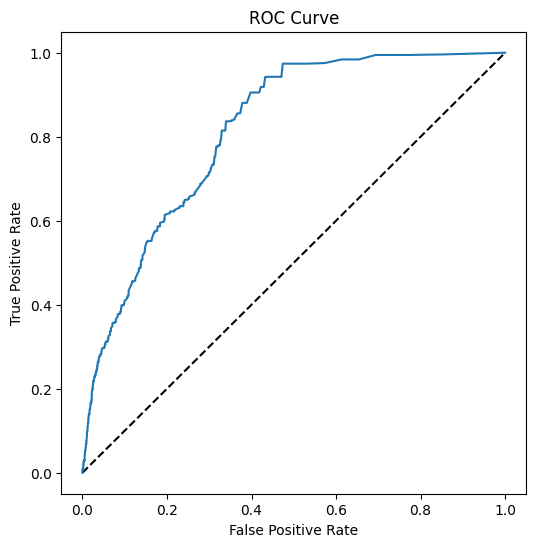

AUC: 0.8164931111111111


In [20]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

predictions_probability_lr = model_lr.predict_proba(X_test_standarized)
fpr, tpr, thresholds = roc_curve(y_test, predictions_probability_lr[:,1])
fig = plt.figure(figsize=(6,6))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()


auc = roc_auc_score(y_test, predictions_probability_lr[:,1])
print('AUC: ' + str(auc))

              precision    recall  f1-score   support

           0       0.78      0.85      0.82      3000
           1       0.64      0.53      0.58      1500

    accuracy                           0.75      4500
   macro avg       0.71      0.69      0.70      4500
weighted avg       0.74      0.75      0.74      4500



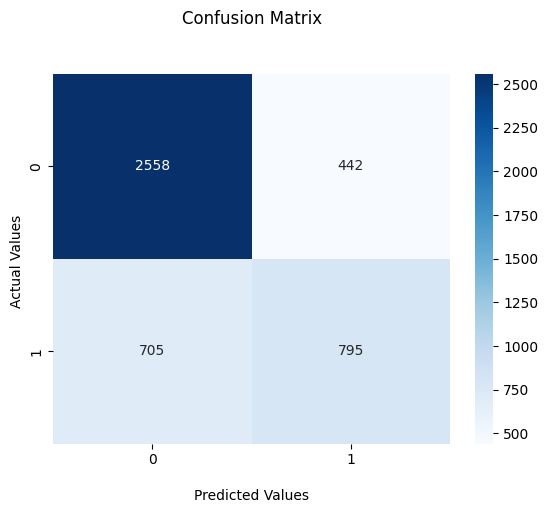

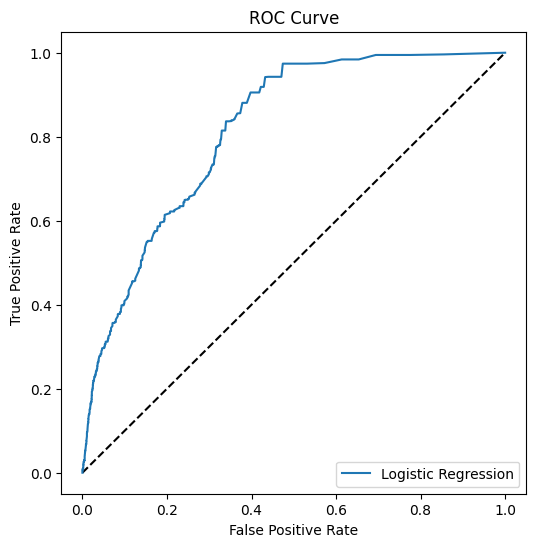

,Model,F1_score,AUC
0,Logistic Regression,0.580928,0.816493


In [21]:
metrics_dataframe = pd.DataFrame(columns = ['Model', 'F1_score', 'AUC'])
metrics_dataframe
models = []
models_names = []
predictions_proba_list = []
def calculate_metrics(model, name, X_checked, y_checked):
    models.append(model)
    models_names.append(name)
    global metrics_dataframe
    predictions = model.predict(X_checked)
    predictions_proba = model.predict_proba(X_checked)
    predictions_proba_list.append(predictions_proba[:,1])

    ############## metryki dla sprawdzanego modelu ################
    # Precision, Recall, F1, Accuracy
    print(classification_report(y_checked, predictions))

    # Confusion matrix
    plt.figure()
    cm = confusion_matrix(y_checked, predictions)
    ax = sns.heatmap(cm, annot=True, cmap='Blues', fmt='.0f')
    ax.set_title('Confusion Matrix\n\n')
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ')
    plt.show()

    # plot ROC curve
    fig = plt.figure(figsize=(6, 6))
    plt.plot([0, 1], [0, 1], 'k--')
    for model_selected, name_selected, pred_proba in zip(models, models_names, predictions_proba_list):
        fpr, tpr, thresholds = roc_curve(y_checked, pred_proba)
        plt.plot(fpr, tpr, label=name_selected)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='lower right')
    plt.show()

    f1_metric = f1_score(y_checked, predictions)
    auc_metric = roc_auc_score(y_checked, predictions_proba[:,1])
    new_row = pd.DataFrame({'Model': [name], 'F1_score': [f1_metric], 'AUC': [auc_metric]})
    metrics_dataframe = pd.concat([metrics_dataframe, new_row], ignore_index=True)


    return metrics_dataframe
    
calculate_metrics(model_lr, 'Logistic Regression', X_test_standarized, y_test)

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X[['Pregnancies', 'Age']], y, test_size=0.20, random_state=0, stratify=y)
print('Treningowe obserwacje: %d\nTestowe obserwacje: %d' %(X_train.shape[0], X_test.shape[0]))

Treningowe obserwacje: 12000
Testowe obserwacje: 3000


In [23]:
#nie wiem czy tutaj dobrze postępuję ale według mnie do plot_classification_surface konieczny był nowy podział
#w Przeciwnym razie wykres wyszedłby dokłądnie taki sam jak wyżej
#dla tego podziału nadal wybrałam tylko pregnancies i age bo zostało to już ustalone że to są cechy najbardziej istotne dla y
#zmieniłam po prostu test_size z 0.3 na 0.2. Nie wiem czy to ma sens
#ElasticNet też policzyłam dla nowego podziału, ale to akurat mogło być dla poprzedniego, tak myślę, bo regularyzacja nie była liczona wcale

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

scaler_2var = StandardScaler()
X_train_standarized2 = scaler_2var.fit_transform(X_train)
X_test_standarized2 = scaler_2var.transform(X_test)
model_lr2 = LogisticRegression()
model_lr2.fit(X_train_standarized2, y_train)

LogisticRegression()

In [25]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.exceptions import ConvergenceWarning
import warnings

warnings.filterwarnings("ignore", category=ConvergenceWarning)

polynomial_regression_pipeline = make_pipeline(PolynomialFeatures(),
                                              ElasticNet(max_iter=10000))

params = {
    'polynomialfeatures__degree': [1, 2, 3, 4, 5], 
    'elasticnet__alpha': [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1.0, 10.0, 100.0],
    'elasticnet__l1_ratio': np.arange(0, 1.1, 0.1)
}

cv=5
polynomial_regression_gridsearch = GridSearchCV(polynomial_regression_pipeline,
                                                params,
                                                scoring = 'neg_mean_squared_error',
                                                cv=cv)

polynomial_regression_gridsearch.fit(X_train_standarized2, y_train)
print("\nNajlepsze hiperparametry:", polynomial_regression_gridsearch.best_params_,"\n")

polynomial_regression_model = polynomial_regression_gridsearch.best_estimator_
predictions = polynomial_regression_model.predict(X_test_standarized2)
print(f'RMSE: {np.sqrt(mean_squared_error(y_test, predictions))}')


Najlepsze hiperparametry: {'elasticnet__alpha': 0.0001, 'elasticnet__l1_ratio': np.float64(0.0), 'polynomialfeatures__degree': 5} 

RMSE: 0.32627657226961754


In [26]:
# mała regularyzacja, model dąży do uzyskania precyzyjnych współczynników unikając przetrenowania
#regularyzacja Ridge - równomiernie zmniejszane są współczynnki bez wyzerowania ich
#stopień 5 może pomóc w uchwyceniu skomplikowanych zależności ale zwiększa ryzyko nadmiernego dopasowania się
#zwłaszcza przy mniejszych zbiorach
#RMSE sugeruje że model jest dobrze dopasowany, można policzyć jeszcze MAPE, MAE i R^2 żeby sprawdzić generalizację

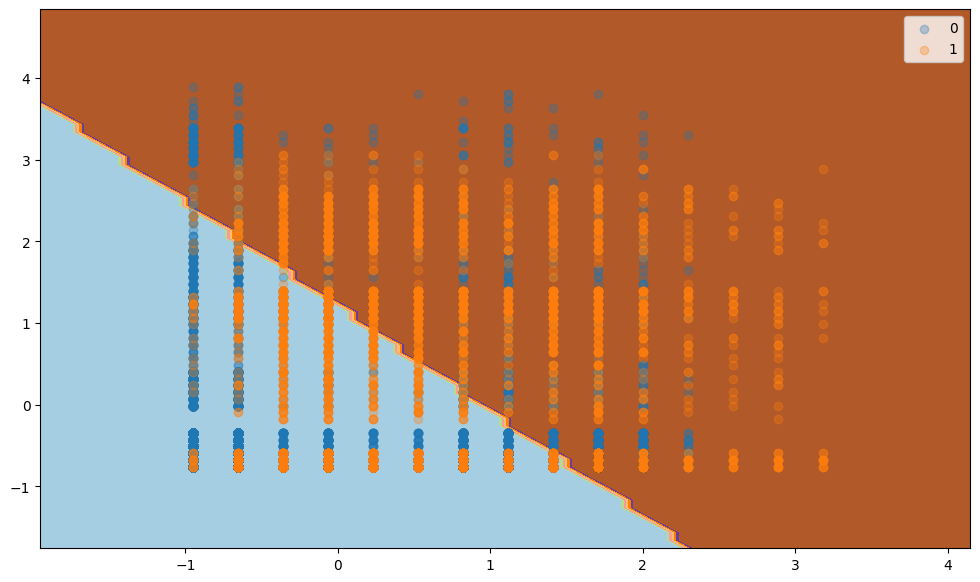

In [27]:
from numpy import where
from numpy import meshgrid
from numpy import arange
from numpy import hstack

def plot_classification_surface(X_plot, y_plot, trained_model):
    plt.figure(figsize=(12, 7))

    min1, max1 = X_plot[:, 0].min()-1, X_plot[:, 0].max()+1
    min2, max2 = X_plot[:, 1].min()-1, X_plot[:, 1].max()+1

    x1grid = arange(min1, max1, 0.1)
    x2grid = arange(min2, max2, 0.1)
    xx, yy = meshgrid(x1grid, x2grid)

    r1, r2 = xx.flatten(), yy.flatten()
    r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))

    grid = hstack((r1,r2))
    yhat = trained_model.predict(grid)
    zz = yhat.reshape(xx.shape)
    plt.contourf(xx, yy, zz, cmap='Paired')
    
    for class_value in range(2):
        row_ix = where(y_plot == class_value)
        plt.scatter(X_plot[row_ix, 0], X_plot[row_ix, 1], cmap='Paired', alpha=0.3, label=class_value)
    
    plt.legend(loc='upper right')
    plt.show()

plot_classification_surface(X_plot=X_train_standarized2, y_plot=y_train, trained_model=model_lr2)

In [28]:
predictions_lr2 = model_lr2.predict(X_test_standarized2)
print('Predicted labels: ', predictions_lr2[:5],predictions_lr2[-5:])
print('Actual labels:    ', y_test[:5].values, y_test[-5:].values)

Predicted labels:  [1 1 0 0 0] [0 0 0 1 0]
Actual labels:     [1 1 0 1 0] [0 0 0 0 0]


In [29]:
predictions_lr3 = model_lr2.predict(X_train_standarized2)
print('Predicted labels: ', predictions_lr3[:5],predictions_lr3[-5:])
print('Actual labels:    ', y_train[:5].values, y_train[-5:].values)

Predicted labels:  [1 0 0 0 0] [0 0 0 1 1]
Actual labels:     [1 1 0 0 0] [0 1 0 1 0]


In [30]:
from sklearn.metrics import f1_score

print("F1_score na zbiorze testowym:", f1_score(y_test, predictions_lr2))

F1_score na zbiorze testowym: 0.5738161559888579


In [31]:
from sklearn.metrics import f1_score

print("F1_score na zbiorze treningowym:", f1_score(y_train, predictions_lr3))

F1_score na zbiorze treningowym: 0.5515675982408852


In [32]:
#wyniki na zbiorze treningowym i testowym są zbliżone co oznacza że model nie jest przetrenowwany ani niedotrenowany
#model jest stabilny ale według mnie konieczne jest dodanie nowych cech